<a href="https://colab.research.google.com/github/CatMolnia/ML_-grokking-Machine-Learning-/blob/main/Coding_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Устанавливаем** **пакеты**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random

**Код для отрисовки графиков**

In [ ]:
def plot_points(features, labels):
  X = np.array(features)
  y = np.array(labels)
  plt.scatter(X, y)
  plt.xlabel('numbers of rooms')
  plt.ylabel('prices')

**Датасет**

In [ ]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


**Строим график датасета**

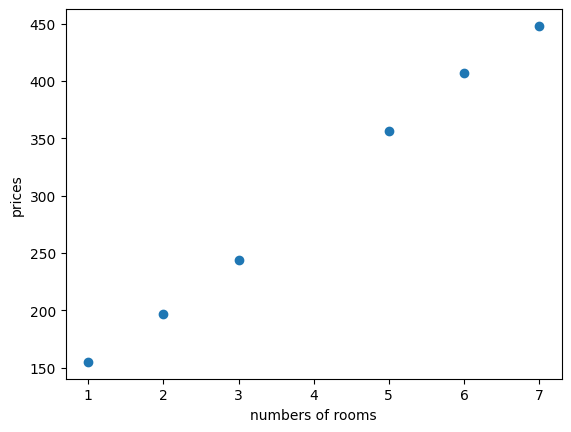

In [ ]:
plot_points(features, labels)

**Основная часть кода**

*   простой подход:

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):

  small_random_1 = random.random()*0.1 # шаг обучения для цены
  small_random_2 = random.random()*0.1 # шаг обучения для комнаты

  predicted_price = base_price + price_per_room * num_rooms # линейная формула

  # если реальная цена выше, чем предсказанная (при этом точка справа сверху от прямой)
  if price > predicted_price and num_rooms > 0:
    price_per_room += small_random_1 # немного увеличиваем цену за комнату
    base_price += small_random_2 # немного увеличиваем  базовую цену

  # если реальная цена выше, чем предсказанная (при этом точка слева сверху от прямой)
  if price > predicted_price and num_rooms < 0:
    price_per_room -= small_random_1 # немного уменьшаем цену за комнату
    base_price += small_random_2 # немного увеличиваем базовую цену

  # если реальная цена ниже, чем предсказанная (при этом точка права снизу от прямой)
  if price < predicted_price and num_rooms > 0:
    price_per_room -= small_random_1 # # немного уменьшаем цену за комнату
    base_price -= small_random_2 # немного уменьшаем базовую цену

  # если реальная цена ниже, чем предсказанная (при этом точка слева снизу от прямой)
  if price < predicted_price and num_rooms < 0:
    price_per_room -= small_random_1 # # немного уменьшаем цену за комнату
    base_price += small_random_2 # немного увеличиваем базовую цену

  return predicted_price, base_price



  *   Квадратический подход:



In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
  predicted_price = base_price + price_per_room * num_rooms # линейная формула (вычислем прогноз)
  base_price += learning_rate * (price-predicted_price) # перемещаем прямую
  price_per_room += learning_rate * num_rooms * (price - predicted_price) # вращаем прямую
  return predicted_price, base_price



*   Абсолютный подход:

